In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [234]:
df = pd.read_csv('train.csv')
df.set_index('id', inplace=True)
df['log_loss'] = np.log10(df.loss)
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,3.345017
2,A,B,A,A,A,A,A,A,B,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,3.108430
5,A,B,A,A,B,A,A,A,B,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,3.477857
10,B,B,A,B,A,A,A,A,B,A,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,2.973059
11,A,B,A,B,A,A,A,A,B,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,3.441514


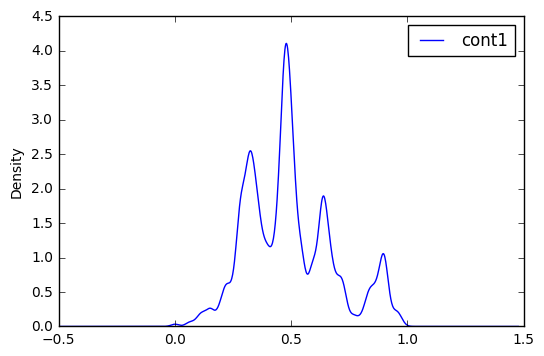

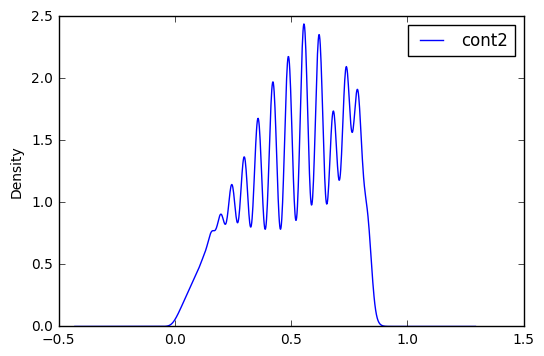

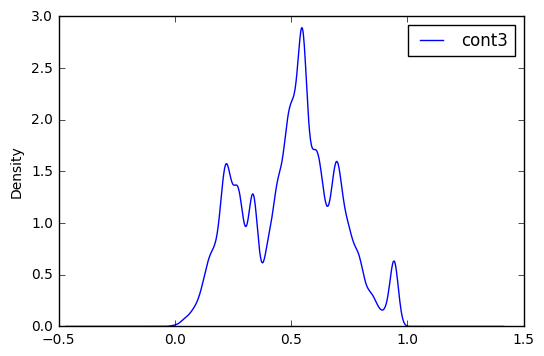

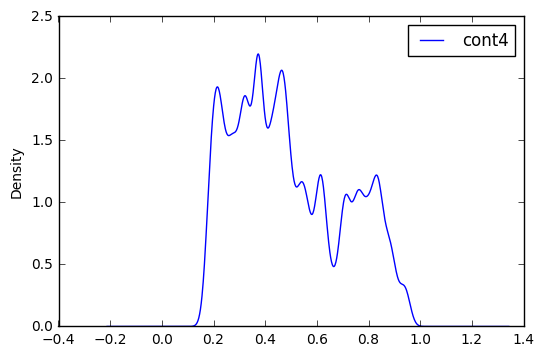

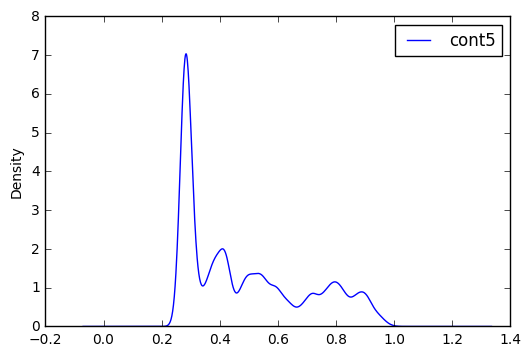

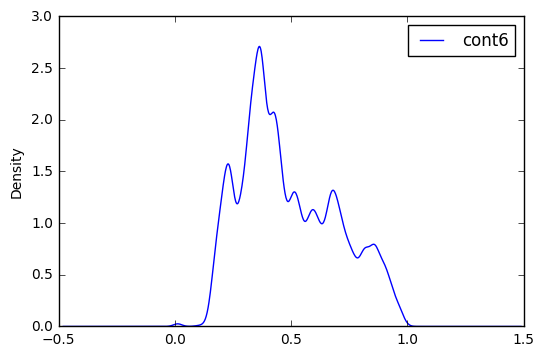

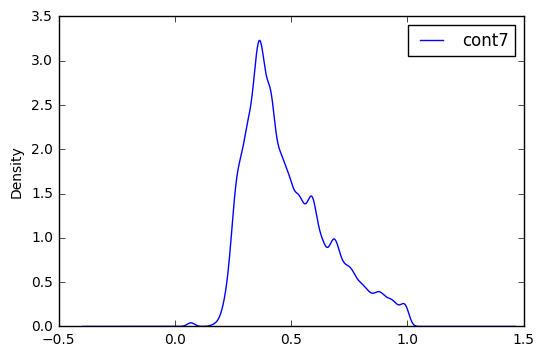

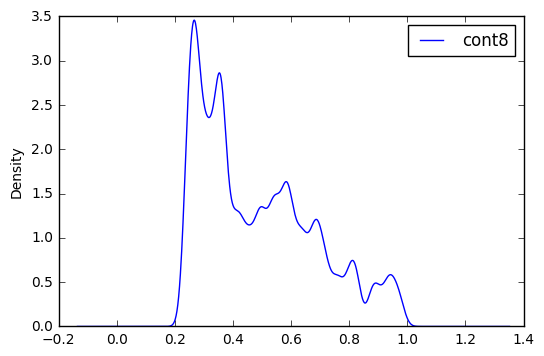

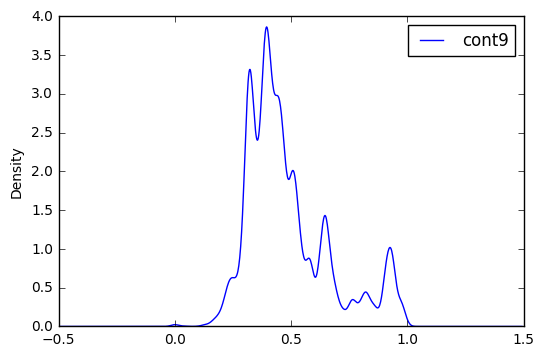

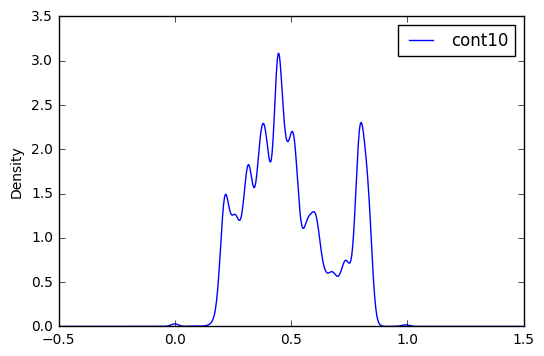

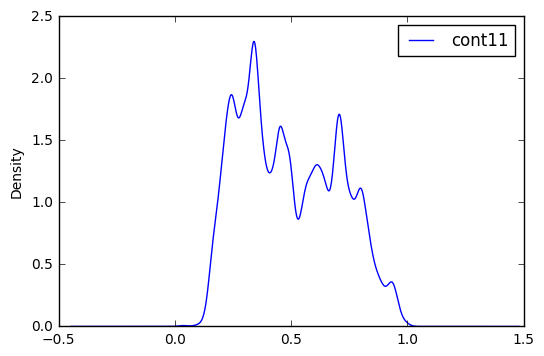

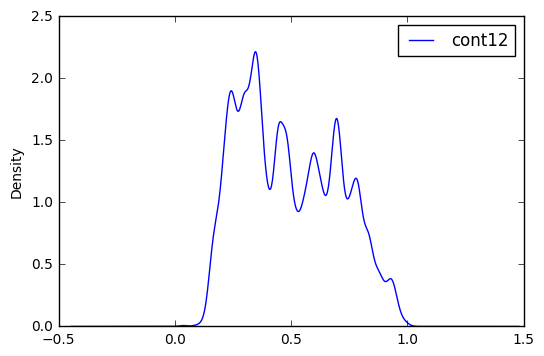

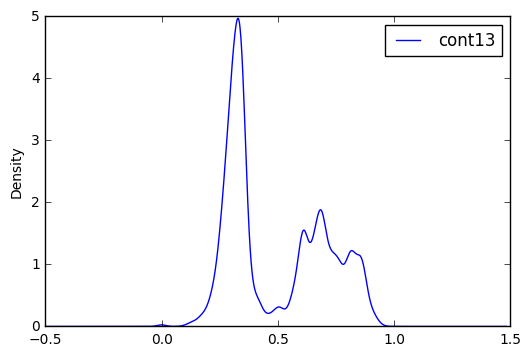

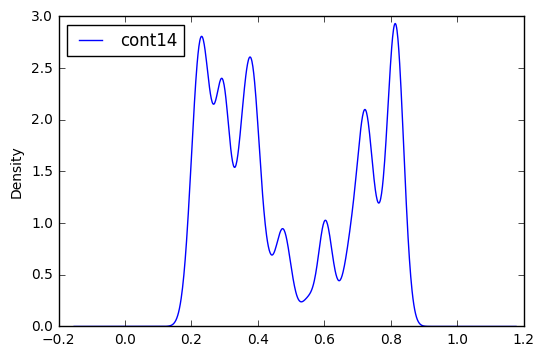

In [50]:
# df.plot(y='cont1', kind='kde')
# df.plot(y='cont2', kind='kde')
for c in df.columns.values:
    if 'cont' in c: df.plot(y=c, kind='kde')

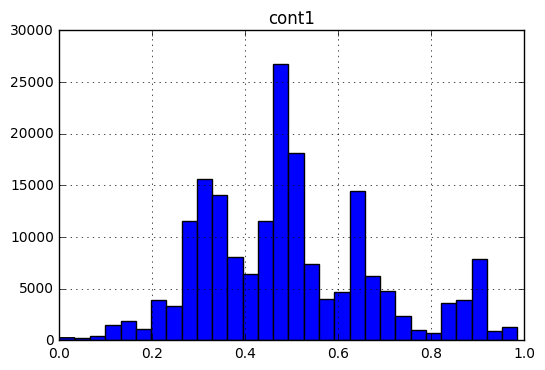

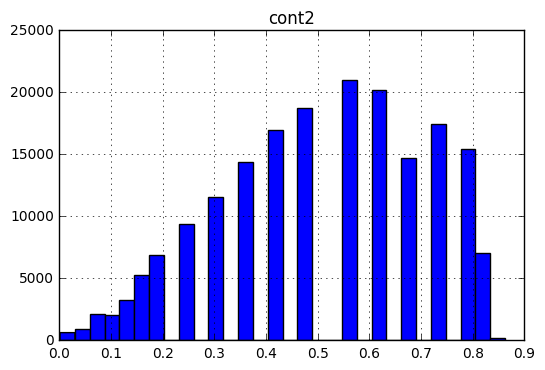

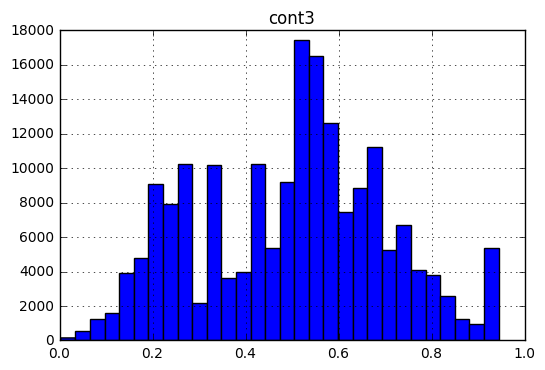

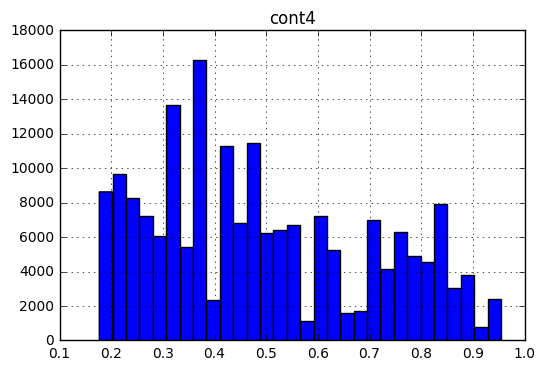

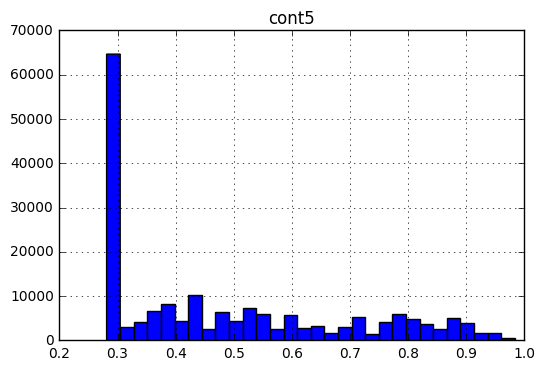

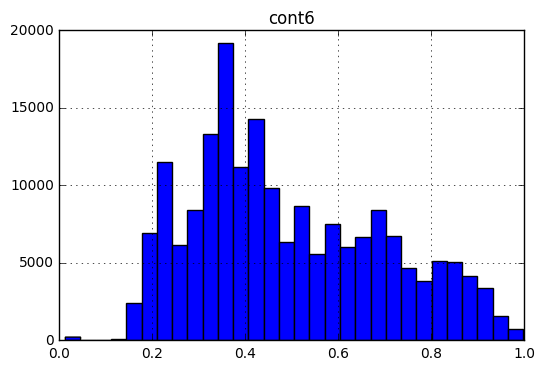

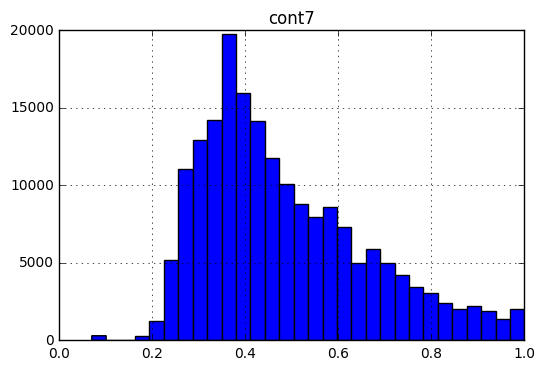

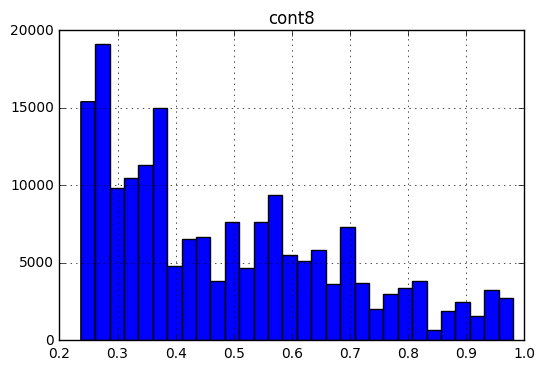

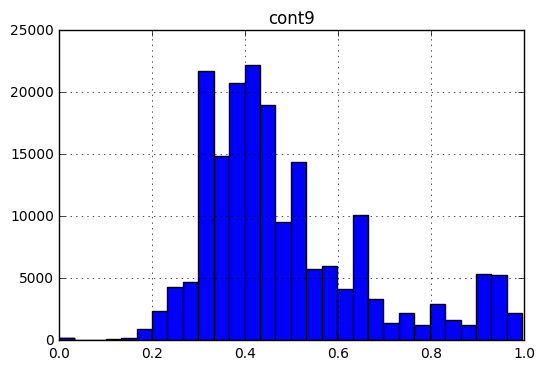

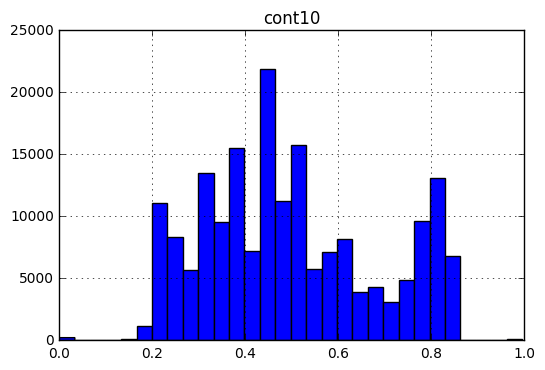

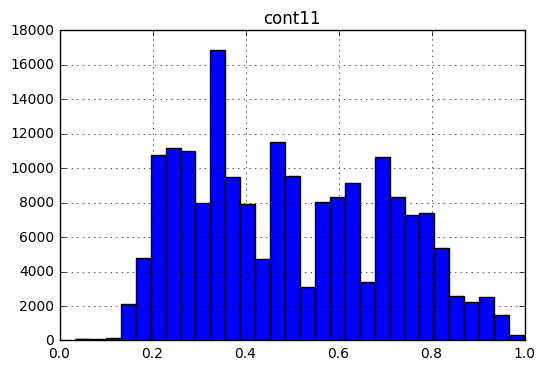

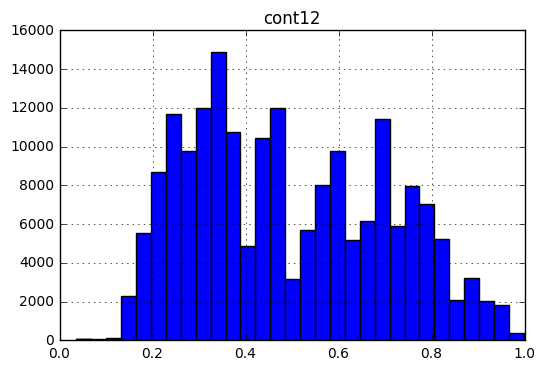

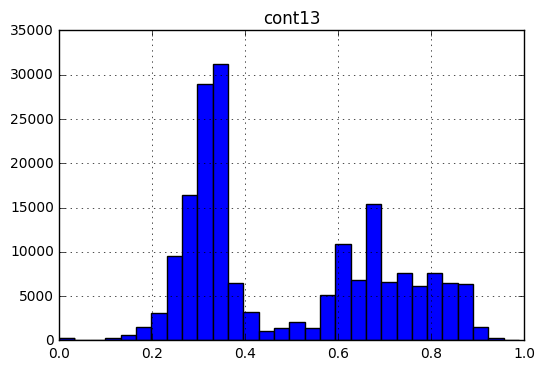

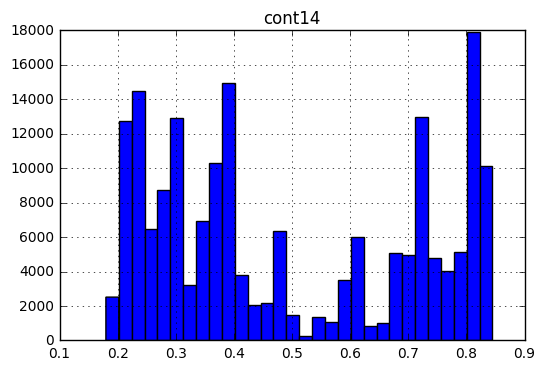

In [157]:
for c in df.columns.values:
    if 'cont' in c: df.hist(c, bins=30)

In [284]:
cat_space = {c:dict(s.value_counts()) for c,s in df.items() if 'cat' in c}
cat_size = {k:len(v) for k,v in cat_space.items()}
sorted(cat_size.items(), key=lambda x:x[1], reverse=True)[:10]

[('cat116', 326),
 ('cat110', 131),
 ('cat109', 84),
 ('cat113', 61),
 ('cat112', 51),
 ('cat115', 23),
 ('cat105', 20),
 ('cat107', 20),
 ('cat114', 19),
 ('cat101', 19)]

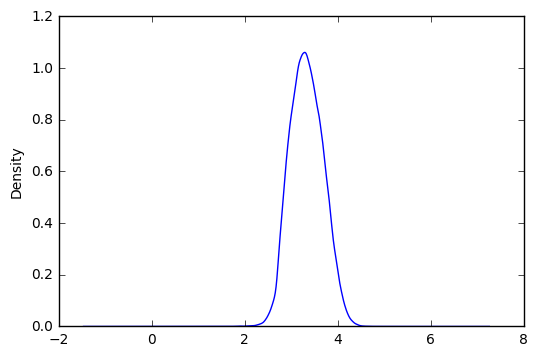

In [283]:
df.log_loss[lambda x:x>0].plot(kind='kde')
# df2.plot(x='log_loss', y='cont1', style='.', kind='scatter')

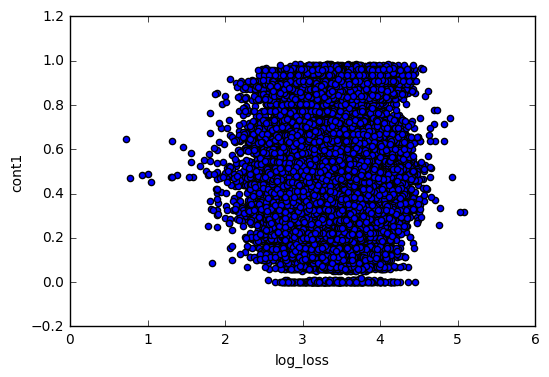

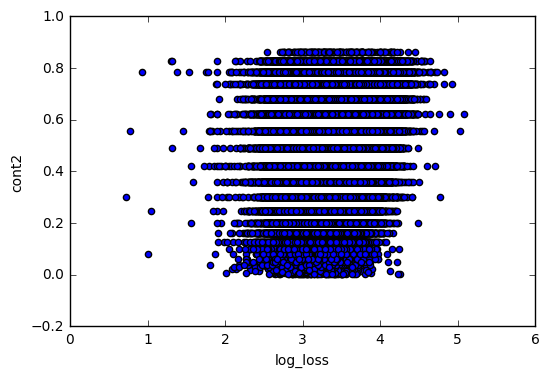

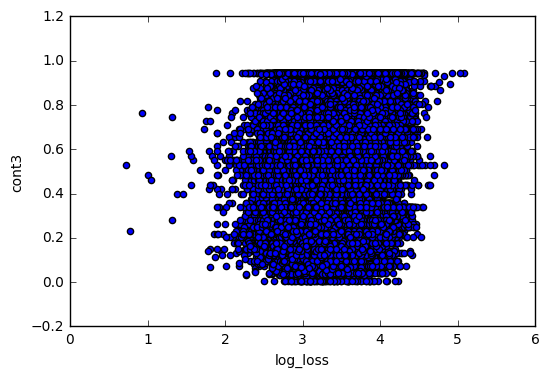

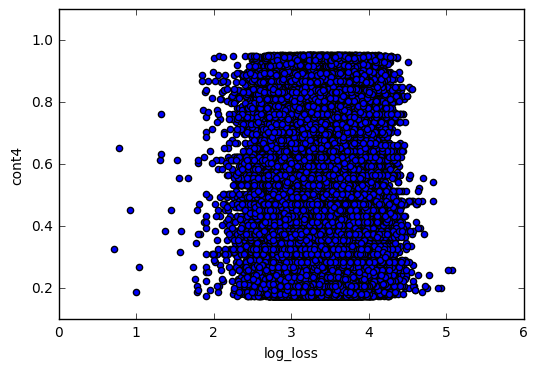

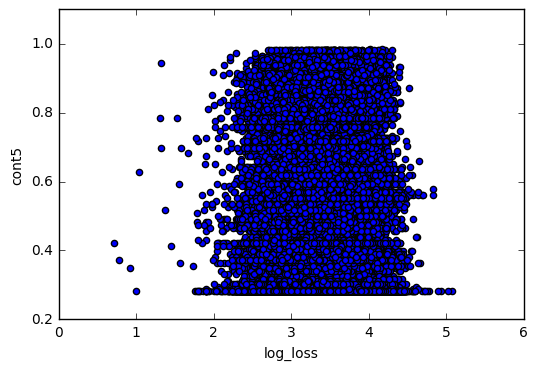

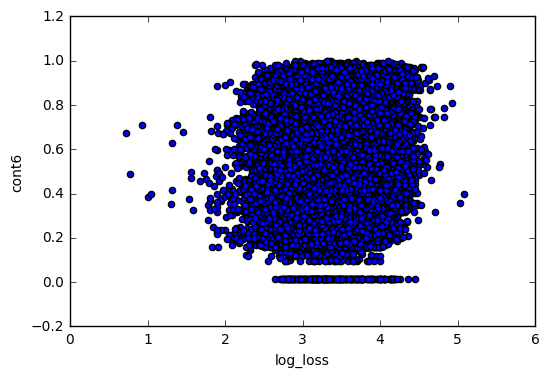

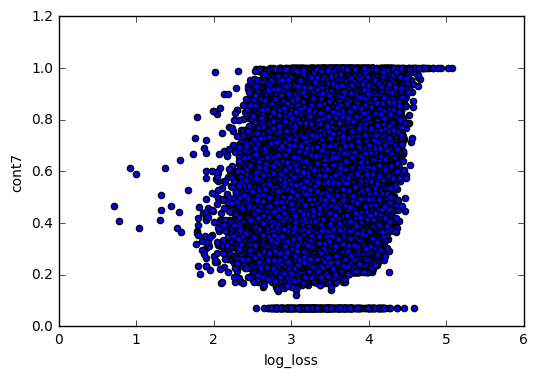

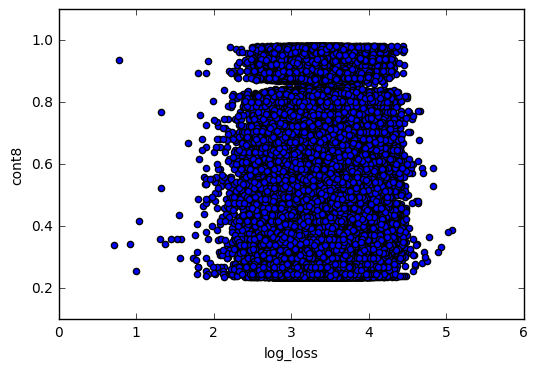

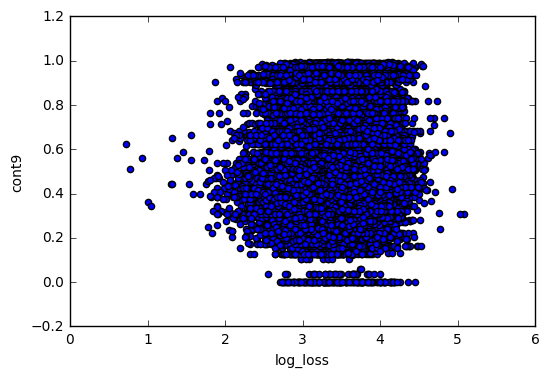

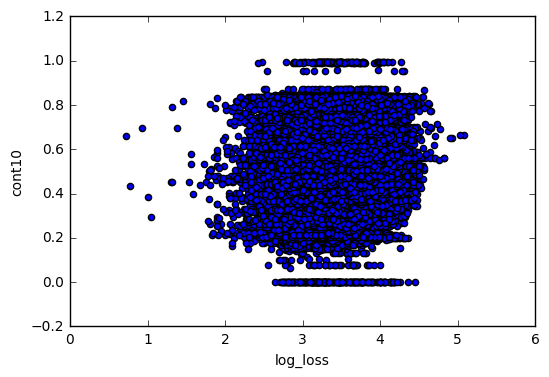

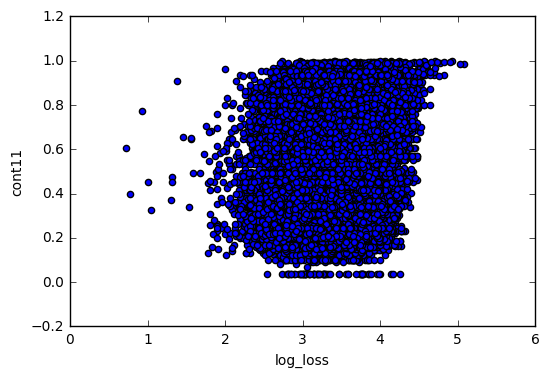

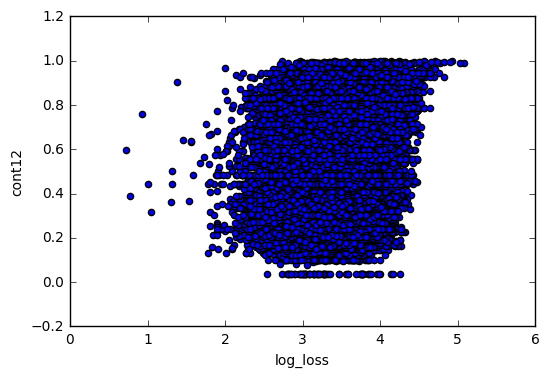

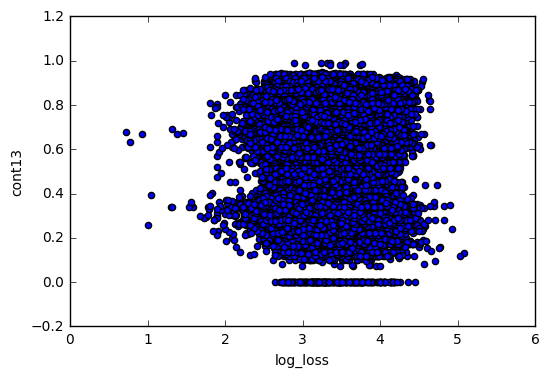

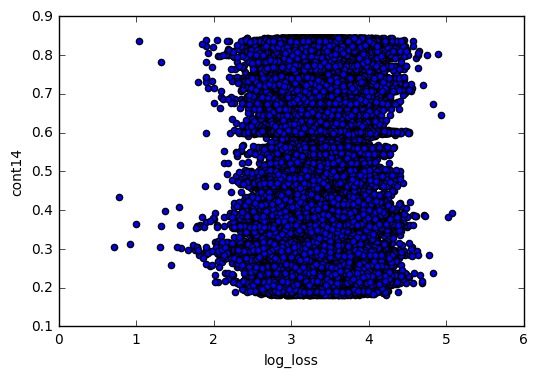

In [96]:
df2 = df[lambda x:x.log_loss>0]
for c in df.columns.values:
    if 'cont' in c: df2.plot(x='log_loss', y=c, kind='scatter', style='.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132f7fb70>]], dtype=object)

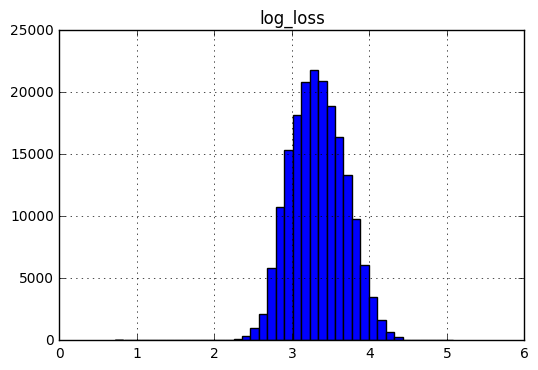

In [111]:
# plt.hist(df.loss[lambda x:x<20000], bins=20)
# a = plt.hist(np.log10(df.loss[lambda x:x>1]), bins=40)
df2.hist('log_loss', bins=40)

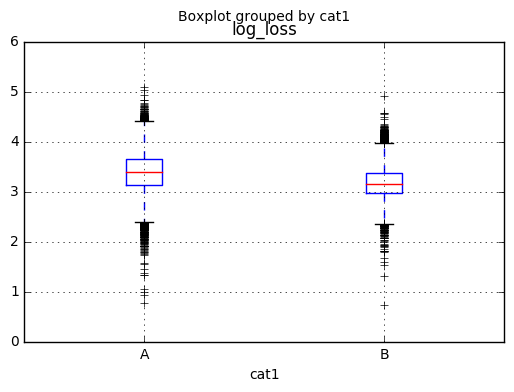

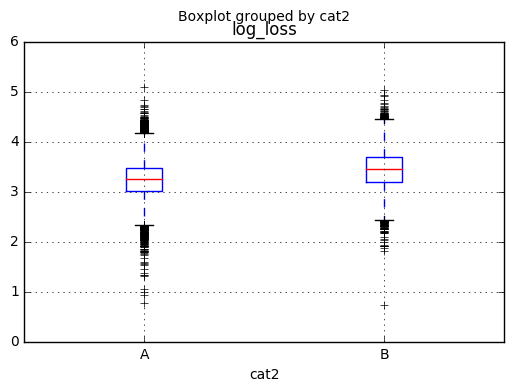

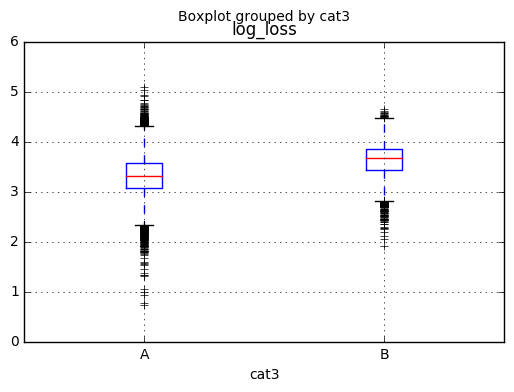

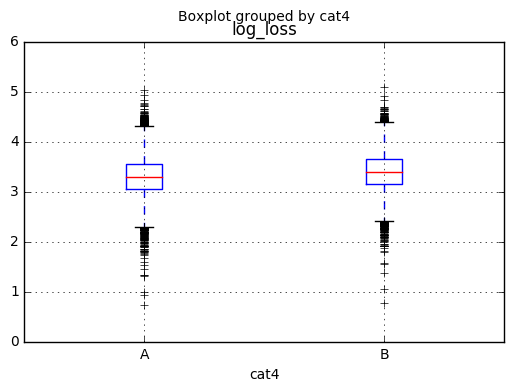

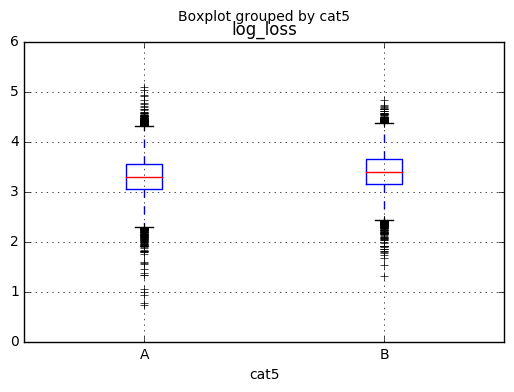

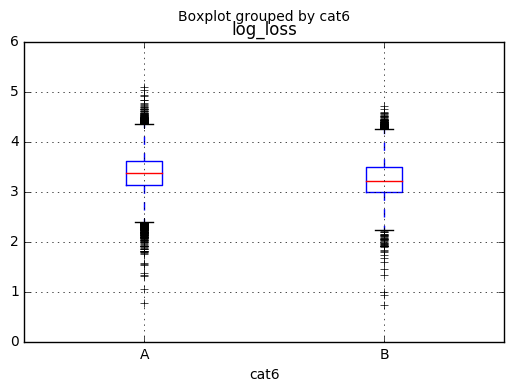

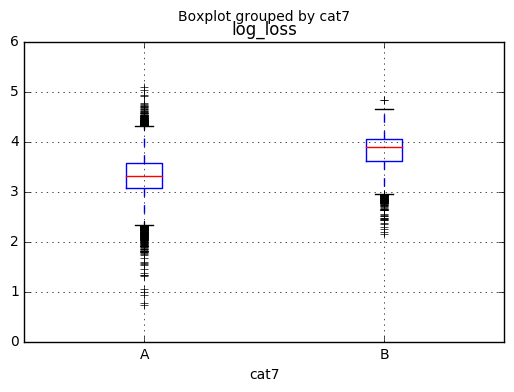

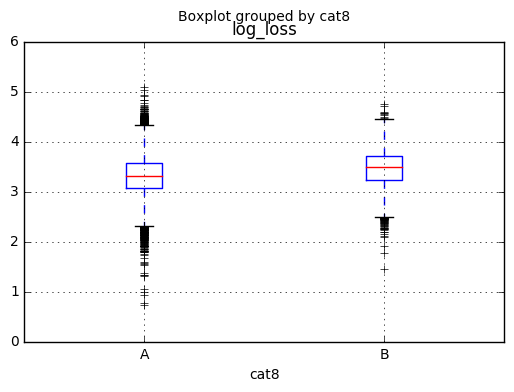

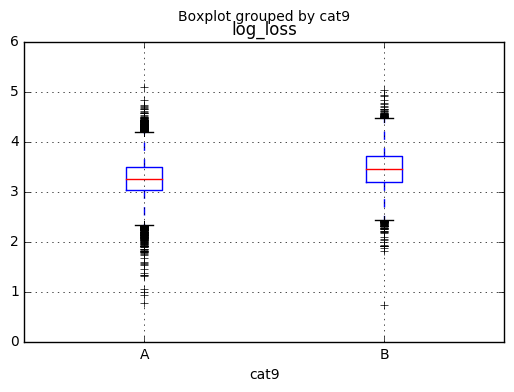

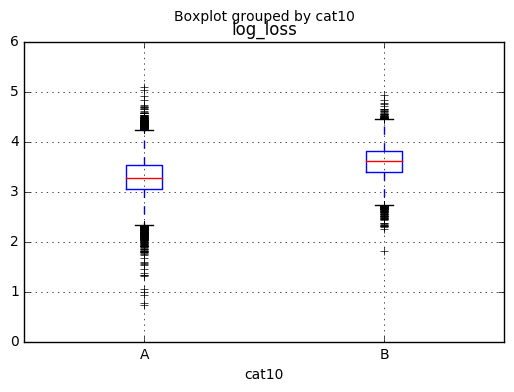

In [108]:

df2 = df[lambda x:x.log_loss>0]
for c in df.columns.values:
    if int(c[3:])>10: break
    if 'cat' in c: df2.boxplot('log_loss', by=c)
    

In [112]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [113]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)

In [130]:
type(boston)

sklearn.datasets.base.Bunch

In [121]:
cross_val_score(regressor, boston.data, boston.target, cv=10)

array([ 0.52939335,  0.60461936, -1.60907519,  0.4356399 ,  0.77280671,
        0.42090343,  0.23656049,  0.36140653, -2.06488186, -1.01206601])

In [123]:
regressor.fit(boston.data, boston.target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [131]:
df_test = df2[:100]

In [139]:
regressor.fit(df_test[['cont2','cont1']], df_test.log_loss)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [148]:
regressor.tree_.feature

array([ 0,  1,  1,  0,  1,  1, -2,  0,  1, -2,  1, -2,  1, -2, -2, -2,  1,
        1,  0,  0, -2, -2, -2,  0, -2, -2,  1,  0, -2, -2,  0,  0, -2,  1,
       -2, -2,  1,  0, -2, -2,  1,  1, -2, -2, -2,  1, -2,  1, -2,  0, -2,
       -2,  1,  0, -2, -2,  0,  1, -2,  0, -2, -2, -2,  1,  0,  1, -2,  1,
       -2,  0, -2, -2,  0,  1, -2,  0, -2, -2,  1, -2,  0, -2, -2,  1,  0,
       -2,  1,  1, -2,  0, -2,  1, -2, -2,  0, -2, -2,  1,  1,  1,  1,  1,
        1,  0, -2,  1, -2,  1, -2, -2,  1, -2, -2,  0, -2, -2,  0,  1,  1,
       -2,  1, -2,  1, -2, -2,  0, -2,  0, -2, -2, -2,  0,  0, -2, -2,  0,
        0, -2,  1, -2, -2,  1, -2,  1,  1, -2, -2, -2,  1, -2, -2, -2,  1,
        1, -2,  1,  1,  1,  1, -2,  1,  0, -2, -2, -2, -2,  1, -2, -2,  1,
       -2,  1,  0, -2, -2,  1, -2,  1, -2,  0, -2, -2,  1, -2,  0, -2, -2])

# encode of categorical variables

In [315]:
cat_idx = {k:{b:a for a,b in enumerate(v.keys())} for k,v in cat_space.items()}
df = df.apply(lambda x: x.map(lambda y: cat_idx[x.name][y]) if 'cat' in x.name else x)
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,log_loss
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,1,1,1,0,1,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,3.345017
2,1,0,1,1,1,1,1,1,0,0,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,3.108430
5,1,0,1,1,0,1,1,1,0,0,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,3.477857
10,0,0,1,0,1,1,1,1,0,1,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,2.973059
11,1,0,1,0,1,1,1,1,0,0,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,3.441514


In [316]:

# cf = ['cat' in x and cat_size[x]>2 for x in df.columns[:-2]]
cf = ['cat' in x for x in df.columns[:-2]]
enc=OneHotEncoder(categorical_features=cf)
fea = enc.fit_transform(df.ix[:,:-2]) # range works for letters too: df.ix[:,'b':]


In [321]:
test = pd.read_csv('test.csv')
test.set_index('id', inplace=True)
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [325]:
test = test.apply(lambda x: x.map(lambda y: cat_idx[x.name].get(y, -1)) if 'cat' in x.name else x)
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,1,0,1,1,1,1,1,1,0,1,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,1,0,1,0,1,1,1,1,0,1,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,1,0,1,0,0,1,0,1,0,0,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,1,1,1,1,0,1,1,1,1,1,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,0,1,1,1,1,0,1,1,1,1,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [356]:
unk = test[[sum(r[1]==-1)>0 for r in test.iterrows()]]

In [1]:
u2 = test[lambda x:x.values==-1]

NameError: name 'test' is not defined

In [399]:
sum(test.loc[564333]==-1)

2

In [382]:
unk.index

Int64Index([  3183,   8241,  16725,  31998,  35490,  46252,  81019,  94021,
             99825, 113691, 171560, 192145, 241664, 259824, 260895, 275145,
            294930, 301607, 309335, 314370, 315515, 329814, 330352, 340430,
            346949, 349638, 403608, 412140, 417455, 423295, 446362, 477254,
            486719, 494379, 505800, 511522, 514740, 516001, 564333, 566860,
            569211, 587255],
           dtype='int64', name='id')

In [383]:
u2.index

Int64Index([  3183,   8241,  16725,  31998,  35490,  46252,  81019,  94021,
             99825, 113691, 171560, 192145, 241664, 259824, 259824, 259824,
            260895, 275145, 294930, 301607, 309335, 314370, 315515, 329814,
            330352, 340430, 346949, 349638, 403608, 412140, 417455, 423295,
            446362, 477254, 486719, 494379, 505800, 511522, 514740, 516001,
            564333, 564333, 566860, 569211, 587255],
           dtype='int64', name='id')

In [384]:
[x for x in u2.index if x not in unk.index]

[]

In [394]:
len(u2.index.unique())

42